<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task-1:--Numerical-Prediction" data-toc-modified-id="Task-1:--Numerical-Prediction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task 1:  Numerical Prediction</a></span></li><li><span><a href="#Task-2:--Classification" data-toc-modified-id="Task-2:--Classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task 2:  Classification</a></span></li><li><span><a href="#Task-3:--Bias-Variance-Tradeoff" data-toc-modified-id="Task-3:--Bias-Variance-Tradeoff-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Task 3:  Bias-Variance Tradeoff</a></span></li></ul></div>

**Solution on Neural Networks**

Charles Liu

In [1]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



# Task 1:  Numerical Prediction

The following data is the type of data that places like zillow.com use to estimate the likely selling price of a home.  The `SalePrice` column gives the log10 of the eventual selling price (1000 houses in `TRAIN`, 460 houses in `HOLDOUT`).  A total of 64 characteristics have been recorded about each house (the data has already been crudely cleaned, with rare levels of categorical variables combined when appropriate, missing values recoded as 0s for numerical variables or as a new level for categorical variables).

In [2]:
load("Homework-Prediction.RData")
summary(TRAIN$SalePrice)
summary(is.na(HOLDOUT$SalePrice))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.548   5.117   5.212   5.224   5.332   5.878 

   Mode    TRUE 
logical     460 

Let's explore a neural network with a single hidden layer.

a.  Use the following arguments to tune on the number of neurons that go into the hidden layer (`size`) and the regularization parameter (`decay`:  the penalty to giving large weights to any predictor).

Make sure to add the arguments `trace=FALSE` so that you don't get buried in output and `linout=TRUE` since we are predicting a numerical response (`linout=FALSE` is only when doing classification).   Because this command takes a while (it took me about a minute and a half), copy/paste the row that has the best choices of the tuning parameters.

In [3]:
fitControl <- trainControl(method="cv",number=5)
nnetGrid <- expand.grid(size=3:7,decay=10^( seq(-1,.2,by=.2) ) )
set.seed(2019); NNET <- train(SalePrice~.,data=TRAIN,method="nnet",tuneGrid=nnetGrid,trace=FALSE,linout=TRUE,
                              trControl=fitControl,preProc = c("center", "scale"))

NNET$results[rownames(NNET$bestTune),]  

,size,decay,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,3,0.2511886,0.0570688,0.890763,0.03910486,0.005900597,0.01903743,0.002307525


b.  Apply the model on `HOLDOUT` data and show the histogram of the prediction, and compare that of the `TRAIN$SalePrice`. Are the distributions reasonably similar?

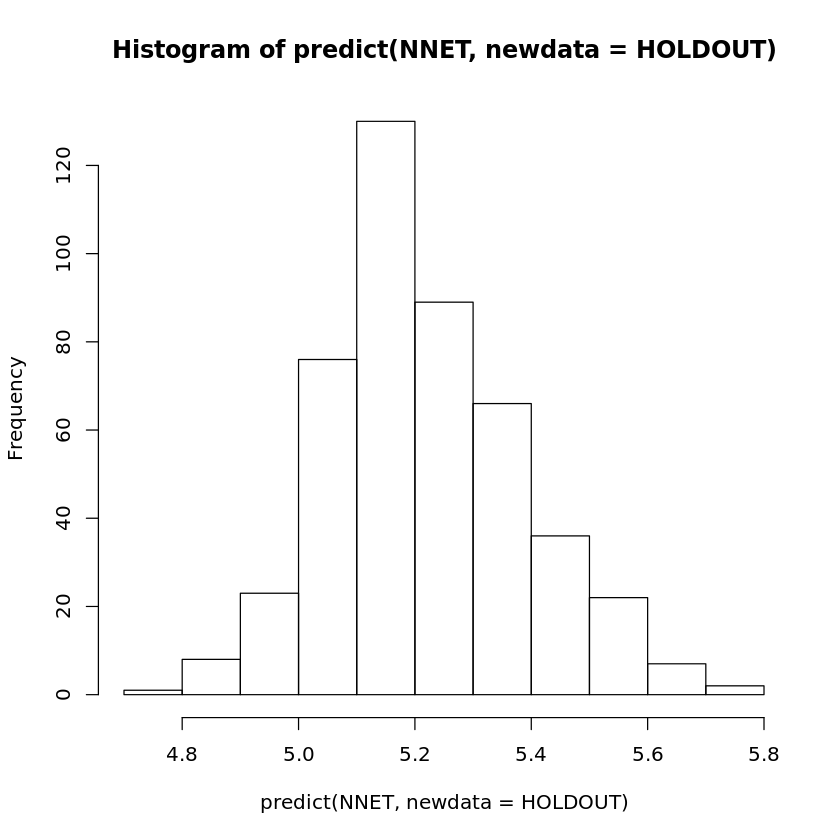

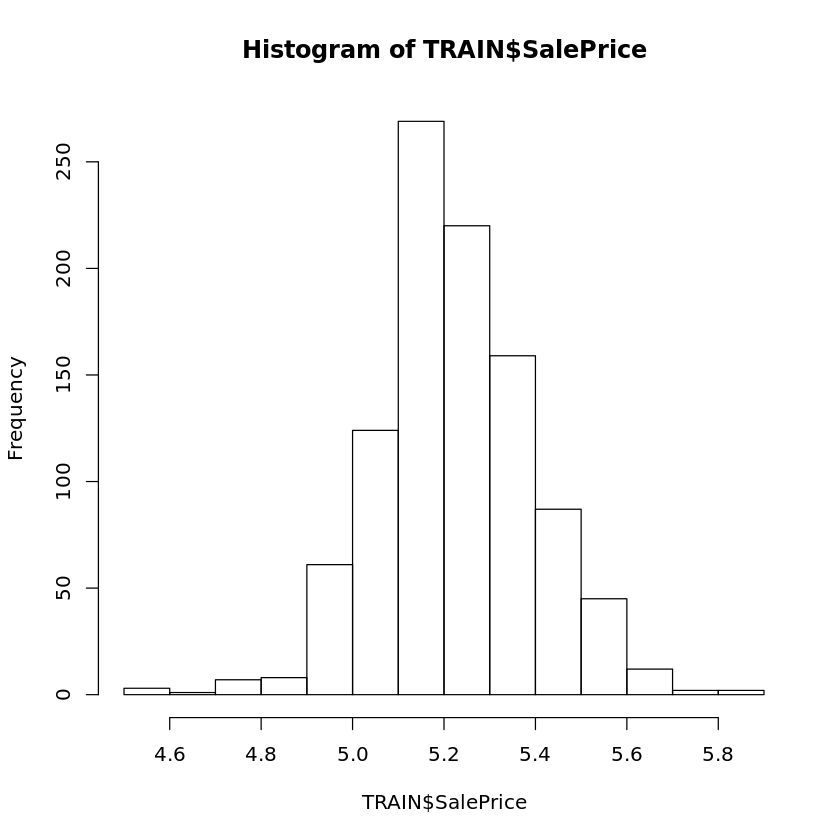

In [4]:
hist(predict(NNET, newdata=HOLDOUT))
hist(TRAIN$SalePrice)

# Task 2:  Classification

The `TELCO` dataframe contains a small part of a customer database from a telecommunications company (similar in nature to the `CHURN` data but for a different company).  

*We will use the data as-is*, and will use the entirety of the data when estimating the generalization errors of different models.  We lose the ability to have an independent assessment of the generalization error of the model on a holdout sample.

a.  Make a `table` of the `Churn` column and report the estimated generalization accuracy of the naive model.

In [5]:
table(TELCO$Churn)
mean(TELCO$Churn == "No")


  No  Yes 
5163 1869 

[1] 0.734215

b.  Let's explore a neural network with a single hidden layer.

Set it up so that the estimated generalization error is being found with 5-fold crossvalidation and that models are tuned on accuracy.

Use the following grid to tune on the number of neurons that go into the hidden layer (`size`) and the regularization parameter (`decay`:  the penalty to giving large weights to any predictor).   Add the arguments `trace=FALSE` (so that you don't get buried in output) and `linout=FALSE` since we are doing classification.  

Because this command takes a while (mine took about a minute), copy/paste the row from `$results` has the best choices of the tuning parameters (i.e., if `NNET` is the object that `train` creates, show `NNET$results[rownames(NNET$bestTune),]`).

In [6]:
fitControl <- trainControl(method="cv",number=5,classProbs=TRUE) 
nnetGrid <- expand.grid(size=3:4,decay=10^( seq(-2,1,by=.5) ) )
set.seed(2019); NNET <- train(Churn~.,data=TELCO,method="nnet",tuneGrid=nnetGrid,trace=FALSE,linout=FALSE,
                              trControl=fitControl,preProc = c("center", "scale"))
NNET$results[rownames(NNET$bestTune),]

,size,decay,Accuracy,Kappa,AccuracySD,KappaSD
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,4,10,0.8030438,0.4673872,0.007804581,0.0256122


c.  Does the model convincingly beat the naive model when it comes to estimated accuracy?  Explain.

**Response:**  Yes. Both have accuracies higher than 1 SD above the naive model.

# Task 3:  Bias-Variance Tradeoff

The "tuning parameters" associated with all the models we have studied allow us to pick the right "form" of the model, i.e., the one that generalizes the best.  In effect, tuning and choosing parameters allows us to determine best tradeoff between the bias and variance of the model.  It's important to understand how the choice of tuning parameter mediates this tradeoff.

a.  If `n.hidden` is the number of neurons in the (single) hidden layer of a neural network, and if `p` is the number of predictor variables, then develop a formula that relates the total number of parameters that must be estimated from the data and these two values.  

In other words, I want an equation that, when you plug in the relevant values of `n.hidden` and `p`, you get the number of parameters that have to be estimated.  Something like (and this is definitely not the answer):  `10 + p*n.hidden + p^2`.

Hint:  remember that each neuron in the hidden layer is fed a weighted sum of the predictor variables plus an additional offset/intercept term, each of these values have be estimated.  Also remember that the outputs from the neurons in the hidden layer are combined in terms of a weighted sum, plus an additional offset/intercept term, in order to come up with a final prediction.

**Response**:

$$ parameters = (1+p)*n.hidden + (n.hidden+1) = 1 + (2+p)*n.hidden $$

When p=6 and n.hidden=3 we have 25 parameters to estimate.

b.  Write a function called `nparameters` that takes two arguments:  `n.hidden` and `p` and returns the number of parameters that have to be estimated when a neural network is fit.  Show the output of `nparameters(3,6)`, `nparameters(5,2)`, and `nparameters(20,85)`.

In [7]:
nparameters <- function(n.hidden, p) {
    parameters = 1 + (2+p)*n.hidden
    return(parameters)
}
nparameters(3,6)
nparameters(5,2)
nparameters(20,85)

[1] 25

[1] 21

[1] 1741

c.  The number of neurons `n.hidden` that we use in the model is a choice.  As we increase the value of `n.hidden`, what happens to the bias of the resulting model?  What happens to the variance?

Hint:  remember to think of bias in terms of how well the model fits the training data, and variance as a measure of how much information is being extracted from individuals in the training data (each additional parameter that needs to be estimated requires an additional bit of information from the data).  More information required by the model = higher sensitivity of model's form to particular set of individuals in the training data = higher variance.

**Response:** As n.hidden increases, the bias will decrease (more flexibility to fit the training data better) but the variance will increase (more parameters in the model requires it to extract more information from the training data, which increases its sensitivity to the particular set of individuals in the data).

d.  In general, by what procedure do we determine the "right" values for these tuning parameters (and it's the same answer for all types of models we have discussed).  

**Response:** Fit many different combinations and estimate the generalization errors of each with `cross validation`! After that, choose the best, or another acceptable model with the 1 SD rule.